# Exploring the k-means clustering algorithm

## Machine Learning, Fall 2021

### Name: Andrew Wen

### General Sources
* https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/
* https://medium.com/nerd-for-tech/k-means-python-implementation-from-scratch-8400f30b8e5c
* https://analyticsarora.com/k-means-for-beginners-how-to-build-from-scratch-in-python/

In this notebook, we'll be exploring the process behind and attempting to implement parts of the famous $k$-means clustering algorithm. First, let's get down the basics behind the algorithm:

## The purpose and objective of the algorithm

The purpose of the $k$-means clustering algorithm, given a dataset $N$ (the set of points on which the algorithm is to be performed) and an integer $k$, is to divide the data points in $N$ into $k$ clusters as "best as possible". 

A clustering's "goodness" is defined by two things:
<ul>
<li> Intracluster distance - a clustering is better if the points in it are more similar to each other. A cluster's "intracluster distance" measures the sum of the distances from each point in that cluster to that cluster's centroid. The smaller a cluster's intracluster distance, the more similar the points in it are to each other, and the better that cluster is. </li> 
<li> Intercluster distance - a clustering is better if the clusters are well defined. That is, clusters are well separated from each other, else there is no reason two similar clusters cannot be combined into one cluster. The greater the intracluster distance between two clusters, the more well distinguished they are, which is indicative of a good clustering </li> 
</ul>
In general, a clustering is better the smaller the intracluster distances of each cluster and the larger the pairwise intercluster distances. In fact, there is a mathematical formula called the Dunn Index that reflects the optimality of a clustering:$$$$
$$\text{Dunn Index} = \frac{\min(\text{Intercluster distance}) \text{ across all Pairs of Clusters}}{\max(\text{Intracluster distances}) \text{ across all Clusters}}$$
$$$$
The greater the Dunn Index, the better the clustering - indeed, as a check, note that increasing Intercluster distances increases the numerator of the Dunn index, and that decreasing Intracluster distances decreases the numerator of the Dunn Index, both of which increase the Dunn index. 

So why do we pick the Dunn Index and not some other measure of goodness? There are other common metrics of "goodness" such as
<ul>
<li> sum of squares of each point to closest centroid </li> 
<li> sum of squares of pairwise distances of centroids </li> 
</ul>
though none of these work as well as the Dunn Index, since the former only depends on intracluster distances while the latter only depends on intercluster distances. 

Now, we create some functions to help with the computation of Intercluster and Intracluster distances:

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# This is the distance function, calculates the distance between two points. 

def distance(X, Y):
    sum = 0
    for i in range (0, len(X)):
        sum = sum + (X[i] - Y[i])**2    
    sum = np.sqrt(sum)
    return sum                

In [70]:
# This is the Intracluster distance formula, given a cluster of points. 

def intracluster(X):
    n, d = np.shape(X)
    
    centroid = np.zeros(d)
    for i in range(0, n):
        centroid = centroid + X[i]
    centroid = centroid * 1/n
    
    sum = 0
    for i in range(0, n):
        sum = sum + distance(centroid, X[i])
    return sum
    

In [71]:
# This is the Intercluster distance formula, given two clusters.

def intercluster(X, Y):
    n_X, d_X = np.shape(X)
    n_Y, d_Y = np.shape(Y)
    
    centroid_X = np.zeros(d_X)
    for i in range(0, n_X):
        centroid_X = centroid_X + X[i]
    centroid_X = centroid_X * 1/n_X
    
    centroid_Y = np.zeros(d_Y)
    for i in range(0, n_Y):
        centroid_Y = centroid_Y + Y[i]
    centroid_Y = centroid_Y * 1/n_Y
    
    return distance(centroid_X, centroid_Y)

In [92]:
# This is the Dunn Index, given a clustering X

def dunn_index(X):
    n = len(X)
    
    maxindex = 0
    for i in range (0, n):
        if intracluster(X[i]) > intracluster(X[maxindex]):
            maxindex = i
    
    mindex_x = 0
    mindex_y = 1
    for i in range(0, n):
        for j in range(0, i):
            if intercluster(X[i], X[j]) < intercluster(X[mindex_x], X[mindex_y]):
                mindex_x = i
                mindex_y = j
                
    ans = intercluster(X[mindex_x], X[mindex_y]) / intracluster(X[maxindex])
    return ans

After creating all relevant methods, let's actually apply them to an example clustering dataset (that is, one that has already been pre-clustered by some methods we do not know, and we are simply evaluating the "goodness" of this already made clustering):

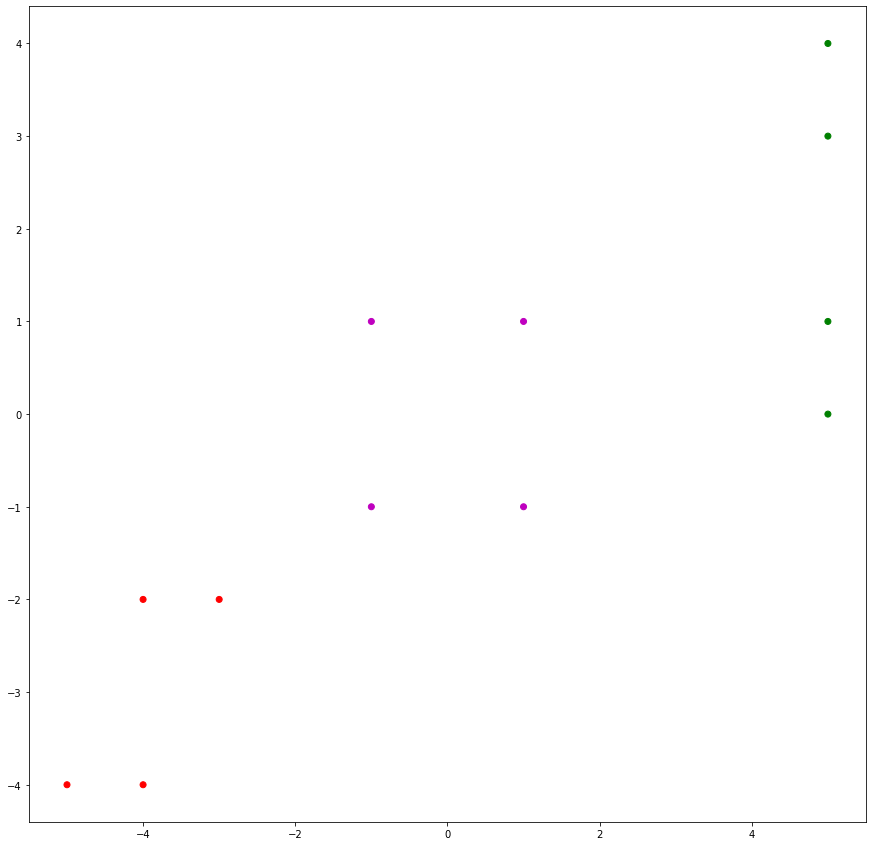

In [118]:
xs = [-1, -1, 1, 1, 5, 5, 5, 5, -5, -4, -4, -3]
ys = [1, -1, -1, 1, 0, 1, 3, 4, -4, -4, -2, -2]
colors = ['m', 'm', 'm', 'm', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r']

xmin, xmax, ymin, ymax = -5, 5, -5, 5
ticks_frequency = 1

fig, ax = plt.subplots(figsize=(15, 15))
ax.scatter(xs, ys, c=colors)

plt.show()

Looking at the above clustering (as indicated by the colors), intuitively, this seems to be a good clustering, as it does seem that similarly located points belong to the same cluster. Let's comupte the Dunn index of this clustering:

In [102]:
cluster_m = []
cluster_g = []
cluster_r = []

for i in range(0, 12):
    if colors[i] == 'm':
        cluster_m.append([xs[i], ys[i]])
    elif colors[i] == 'g':
        cluster_g.append([xs[i], ys[i]])
    elif colors[i] == 'r':
        cluster_r.append([xs[i], ys[i]])

clustering = []
clustering.append(cluster_m)
clustering.append(cluster_g)
clustering.append(cluster_r)

print(dunn_index(clustering))

0.8333333333333334


Now, what if we tweak the clustering a little bit by moving the rightmost points of the red cluster to the magenta cluster?

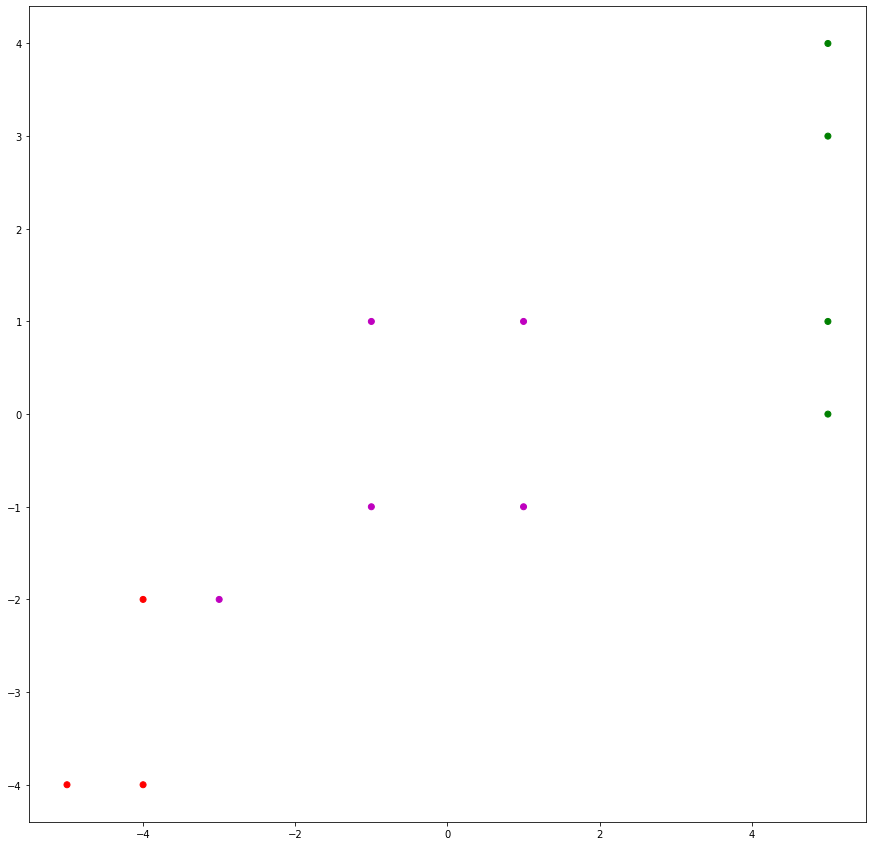

In [117]:
xs = [-1, -1, 1, 1, 5, 5, 5, 5, -5, -4, -4, -3]
ys = [1, -1, -1, 1, 0, 1, 3, 4, -4, -4, -2, -2]
colors = ['m', 'm', 'm', 'm', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'm']

xmin, xmax, ymin, ymax = -5, 5, -5, 5
ticks_frequency = 1

fig, ax = plt.subplots(figsize=(15, 15))
ax.scatter(xs, ys, c=colors)

plt.show()

The new Dunn Index would be:

In [110]:
cluster_m = []
cluster_g = []
cluster_r = []

for i in range(0, 12):
    if colors[i] == 'm':
        cluster_m.append([xs[i], ys[i]])
    elif colors[i] == 'g':
        cluster_g.append([xs[i], ys[i]])
    elif colors[i] == 'r':
        cluster_r.append([xs[i], ys[i]])

clustering = []
clustering.append(cluster_m)
clustering.append(cluster_g)
clustering.append(cluster_r)

print(dunn_index(clustering))

0.5336836617282176


We see that making such a tweak results in a clustering with a lower Dunn Index, which is implied to be "worse".

## The logic behind the algorithm

Now, after we have rigorously defined how to tell whether a clustering is "better" than another, how do we, given nothing but a dataset full of points and the number of clusters we wish to create, reach the clustering with the best possible Dunn Index? 

The $k$-means clustering algorithm follows the following steps:

1. Select $k$ points randomly to be the centroids of the $k$ clusters. 
2. Assign each point from the dataset to the centroid it is closest to, and let each centroid along with the points assigned to it form the clusters.
3. After establishing the clusters, we compute the centroids of each cluster, and repeat step 2 until the clusters converge/become constant. 